Exercise 3.27 Read in a photo and convert to a matrix. Perform a singular value de- composition of the matrix. Reconstruct the photo using only 5%, 10%, 25%, 50% of the singular values.
1. Print the reconstructed photo. How good is the quality of the reconstructed photo?
2. What percent of the Forbenius norm is captured in each case?

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from scipy.linalg import null_space
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the Image
def readImage(fileName):
    img = cv2.imread(fileName)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (400, 400)) 
    print("Image Shape : "+str(img.shape))
    img = np.array(img,dtype=float)
    plt.imshow(img)
    return img

In [3]:
#Returns reconstructed image using u*s*v_t given a rank
def reconstructImage(rank,u,s,vt):
    rImage = np.matmul(np.matmul(u[:,:rank],s[:rank,:rank]),vt[:rank,:])
    return rImage

In [4]:
#Returns Frobenius norm of a matrix
def frobNorm(mat):
    m,n=mat.shape
    s = 0
    for i in np.arange(m):
        for j in np.arange(n):
            s = s + mat[i,j]**2
    s = math.sqrt(s)
    return s

In [5]:
#Prints % of Frobenius norm captured in reconstructed image
def printPercentNormCapture(img,r_img):
    norm_org = frobNorm(img)
    norm_rc = frobNorm(r_img)
    per_capture = (norm_rc/norm_org)*100
    print("% of Frobenius Norm Captured : "+str(per_capture))

In [6]:
#Returns normalised Eigen vector given the matrix and Eigen value
def eigenVector(a,eigenVal):
    a=np.array(a,dtype=complex)
    for i in np.arange(a.shape[0]):
        a[i,i]=a[i,i]-eigenVal
    eigenVector = null_space(a)
    s = 0
    for i in np.arange(eigenVector.shape[0]):
        s = s + eigenVector[i,0]**2
    eigenVector = eigenVector/(s**0.5)
    return eigenVector

In [7]:
#Compute the u,s and v_t components of a matrix
def computeSVD(img):
    a = img
    at_a = np.matmul(a.T,a)
    eigenVals = np.linalg.eigvals(at_a)
    eigenVals = np.sort(eigenVals)[::-1]
    sigma = np.sqrt(eigenVals)
    s = np.zeros((img.shape[0],img.shape[0]),dtype=complex)
    np.fill_diagonal(s,sigma)

    v = np.zeros((img.shape[0],img.shape[0]),dtype=complex)
    u = np.zeros((img.shape[0],img.shape[0]),dtype=complex)

    for i in np.arange(len(eigenVals)):
        v_i = eigenVector(at_a,eigenVals[i])
        u_i = np.matmul(a,v_i)/sigma[i]
        for j in np.arange(img.shape[0]):
            v[j,i] = v_i[j,0]
            u[j,i] = u_i[j,0]
    
    return u,s,v.T

Image Shape : (400, 400)


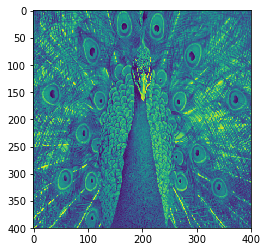

In [8]:
#Reading the image and computing the SVD components
img = readImage("animal.jpg")
u,s,v_t = computeSVD(img)

Case #1 : Reconstructing Image with only 5% of the singular values

% of Frobenius Norm Captured : 97.22677010725509


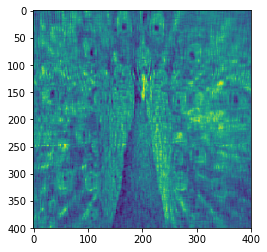

In [13]:
rank = int(img.shape[0]*0.05)
r_img = reconstructImage(rank,u, s, v_t)
printPercentNormCapture(img,r_img)
r_img = np.array(r_img,dtype=np.uint8)
plt.imshow(r_img)

Case #2 : Reconstructing Image with only 10% of the singular values

% of Frobenius Norm Captured : 98.20377508923562


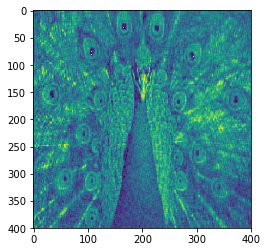

In [14]:
rank = int(img.shape[0]*0.10)
r_img = reconstructImage(rank,u, s, v_t)
printPercentNormCapture(img,r_img)
r_img = np.array(r_img,dtype=np.uint8)
plt.imshow(r_img)

Case #3 : Reconstructing Image with only 25% of the singular values

% of Frobenius Norm Captured : 99.39499637860568


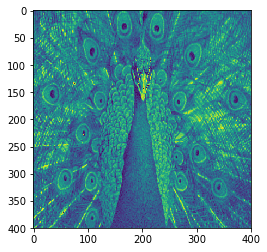

In [15]:
rank = int(img.shape[0]*0.25)
r_img = reconstructImage(rank,u, s, v_t)
printPercentNormCapture(img,r_img)
r_img = np.array(r_img,dtype=np.uint8)
plt.imshow(r_img)

Case #4 : Reconstructing Image with only 50% of the singular values

% of Frobenius Norm Captured : 99.89303359273318


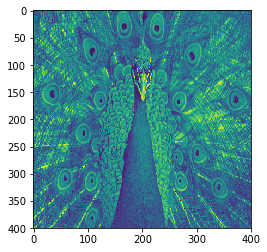

In [16]:
rank = int(img.shape[0]*0.50)
r_img = reconstructImage(rank,u, s, v_t)
printPercentNormCapture(img,r_img)
r_img = np.array(r_img,dtype=np.uint8)
plt.imshow(r_img)